# Imports 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from scipy.integrate import solve_ivp
from SALib.sample import saltelli
from SALib.analyze import sobol
import numpy as np

# Create ODE system and plot the number of cells over time for $T_{1}$, $T_{2}$, $E_{1}$, and $E_{2}$. 

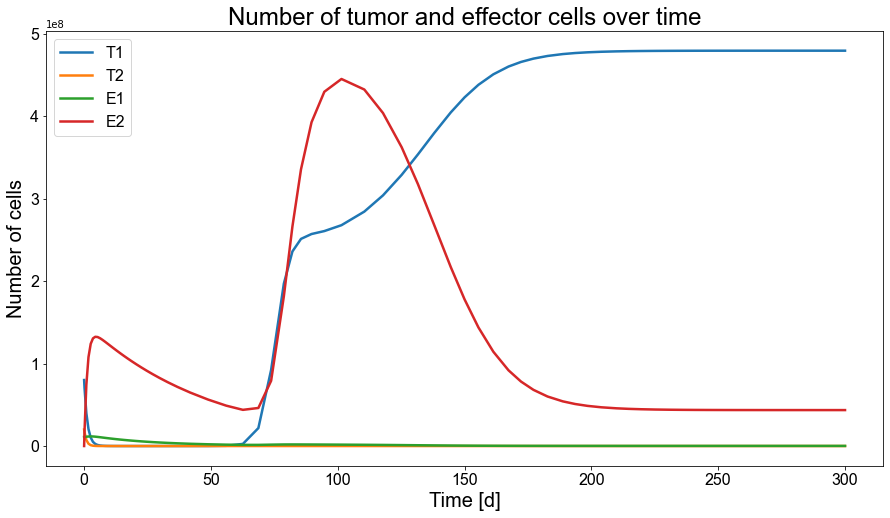

In [3]:
def ode_system(t, state, g1,g2,a11,a12,a21,p1,d1,d2,e1,e2,r1,r2,r3,s1,s2,i12,i21,K1,K2):
    T1,T2,E1,E2 = state
    
    dT1dt = g1*T1*(1-T1/K1) - a11*E1*T1 - a12*E2*T1 - i12*T1*T2
    dT2dt = g2*T2*(1-T2/K2) - a21*E1*T2 - i21*T1*T2
    dE1dt = p1 - d1*E1 - e1*(T1+T2)*E1 + ((r1*(T1+T2))/(s1+T1+T2))*E1
    dE2dt = -d2*E2 - e2*T1*E2 + ((r2*T1)/(s2+T1))*E2 + r3*E1*(T1+T2)
    return [dT1dt, dT2dt, dE1dt, dE2dt]

g1 = 0.514
g2 = 0.35 * g1
a11 = 1.1e-7
a12 = 1.1e-10
a21 = a11
p1 = 1.3e4
d1 = 4.12e-2
d2 = 2.0e-2
e1 = 3.42e-10
e2 = e1
r1 = 1.24e-1
r2 = 1.24e-3
r3 = 1.1e-7
s1 = 2.02e7
s2 = s1
i12 = 1.1e-9
i21 = 1.5*i12
K1 = 5e8
K2 = K1

p = (g1,g2,a11,a12,a21,p1,d1,d2,e1,e2,r1,r2,r3,s1,s2,i12,i21,K1,K2)
initial = [8.0e7,2.0e7,1.1e7,0]

t_span = (0.0, 300.0)
t = np.arange(0.0, 300.0, 0.01)

result_solve_ivp = solve_ivp(ode_system, t_span, initial, args=p)

labels = ['T1', 'T2', 'E1', 'E2']
fig = plt.figure(figsize=(15,8))
for i in range(result_solve_ivp.y.shape[0]):
    plt.plot(result_solve_ivp.t, result_solve_ivp.y[i], label=labels[i], linewidth=2.5)

afont = {'fontname':'Arial'}    
    
plt.xlabel('Time [d]', fontsize=20, **afont) # the horizontal axis represents the time 
plt.ylabel('Number of cells', fontsize=20, **afont)
plt.xticks(size=16, **afont)
plt.yticks(size=16, **afont)
plt.title('Number of tumor and effector cells over time', fontsize = 24, **afont)

font = font_manager.FontProperties(family='Arial',
                                   style='normal', size=16)

plt.legend(prop=font) # show how the colors correspond to the components of X
fig.savefig('Output_ODE1.jpg', dpi=400)
plt.show()

# Make a plot with two different $E_{1}$ initial values

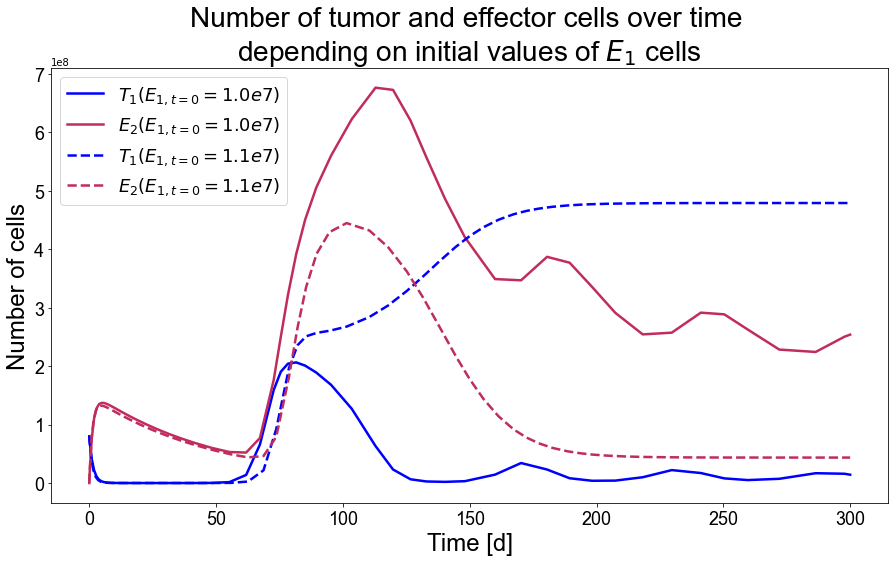

In [10]:
def ode_system(t, state, g1,g2,a11,a12,a21,p1,d1,d2,e1,e2,r1,r2,r3,s1,s2,i12,i21,K1,K2):
    T1,T2,E1,E2 = state
    
    dT1dt = g1*T1*(1-T1/K1) - a11*E1*T1 - a12*E2*T1 - i12*T1*T2
    dT2dt = g2*T2*(1-T2/K2) - a21*E1*T2 - i21*T1*T2
    dE1dt = p1 - d1*E1 - e1*(T1+T2)*E1 + ((r1*(T1+T2))/(s1+T1+T2))*E1
    dE2dt = -d2*E2 - e2*T1*E2 + ((r2*T1)/(s2+T1))*E2 + r3*E1*(T1+T2)
    return [dT1dt, dT2dt, dE1dt, dE2dt]

g1 = 0.514
g2 = 0.35 * g1
a11 = 1.1e-7
a12 = 1.1e-10
a21 = a11
p1 = 1.3e4
d1 = 4.12e-2
d2 = 2.0e-2
e1 = 3.42e-10
e2 = e1
r1 = 1.24e-1
r2 = 1.24e-3
r3 = 1.1e-7
s1 = 2.02e7
s2 = s1
i12 = 1.1e-9
i21 = 1.5*i12
K1 = 5e8
K2 = K1

p = (g1,g2,a11,a12,a21,p1,d1,d2,e1,e2,r1,r2,r3,s1,s2,i12,i21,K1,K2)
initial1 = [8.0e7,2.0e7,1e7,0]
initial2 = [8.0e7,2.0e7,1.1e7,0]

t_span = (0.0, 300.0)
t = np.arange(0.0, 300.0, 0.01)

result_solve_ivp1 = solve_ivp(ode_system, t_span, initial1, args=p)
result_solve_ivp2 = solve_ivp(ode_system, t_span, initial2, args=p)

labels1 = [r"$T_{1}(E_{1,t=0}=1.0e7)$", r"$T_{2}$", r"$E_{1}$", r"$E_{2}(E_{1,t=0}=1.0e7)$"]
labels2 = [r"$T_{1}(E_{1,t=0}=1.1e7)$", r"$T_{2}$", r"$E_{1}$", r"$E_{2}(E_{1,t=0}=1.1e7)$"]
colors = ['#0000FF','#f7b511','#941ee1','#c02d5c']
fig = plt.figure(figsize=(15,8))
#for i in range(result_solve_ivp1.y.shape[0]):
for elem in [0,3]:
    plt.plot(result_solve_ivp1.t, result_solve_ivp1.y[elem], label=labels1[elem], linewidth=2.5, color=colors[elem])
    
for elem in [0,3]:
#for i in range(result_solve_ivp2.y.shape[0]):
    plt.plot(result_solve_ivp2.t, result_solve_ivp2.y[elem], label=labels2[elem], linewidth=2.5, linestyle='dashed', color=colors[elem])

afont = {'fontname':'Arial'}    
    
plt.xlabel('Time [d]', fontsize=24, **afont) # the horizontal axis represents the time 
plt.ylabel('Number of cells', fontsize=24, **afont)
plt.xticks(size=18, **afont)
plt.yticks(size=18, **afont)
plt.title('Number of tumor and effector cells over time \n'+r'depending on initial values of $E_{1}$ cells', \
          fontsize = 28, **afont)

font = font_manager.FontProperties(family='Arial',
                                   style='normal', size=18)

plt.legend(prop=font, loc='upper left') # show how the colors correspond to the components of X
fig.savefig('Comparison.png', dpi=600, transparent=True, bbox_inches='tight')
plt.show()

# Make the same plots for different $E_{1}$ initial values and extract $T_{1}$ values for the time t = 250. 

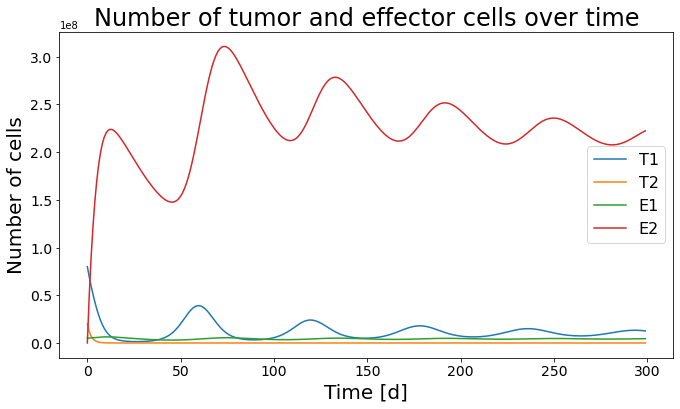

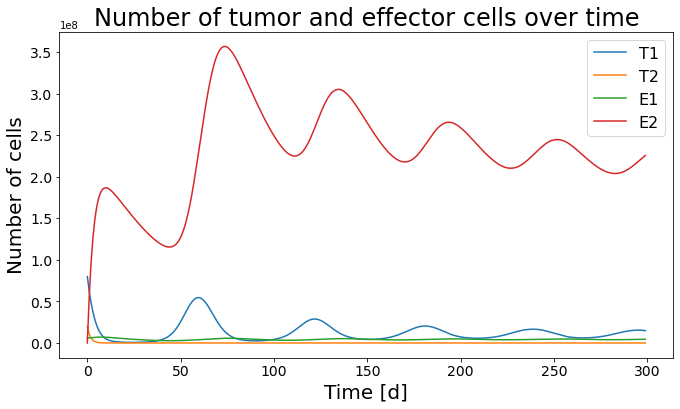

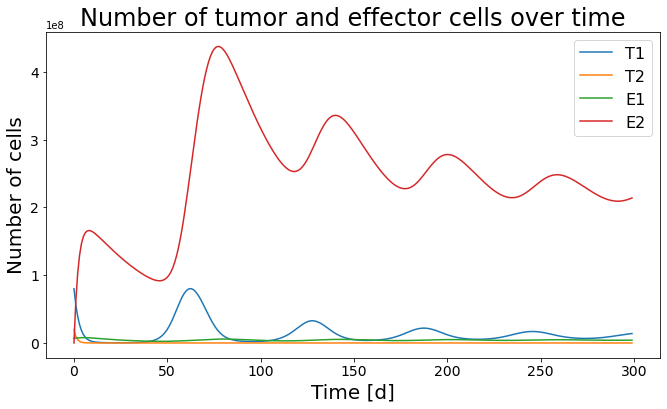

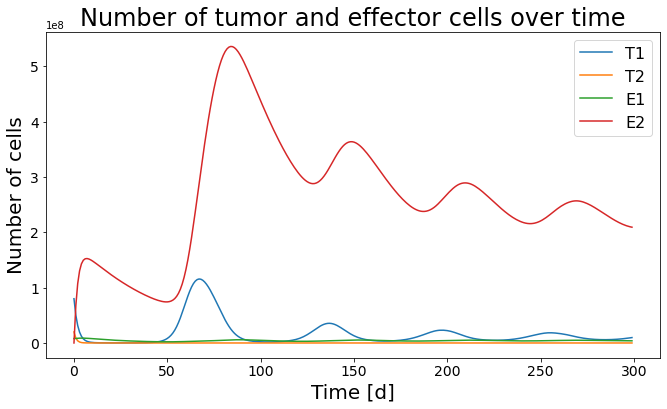

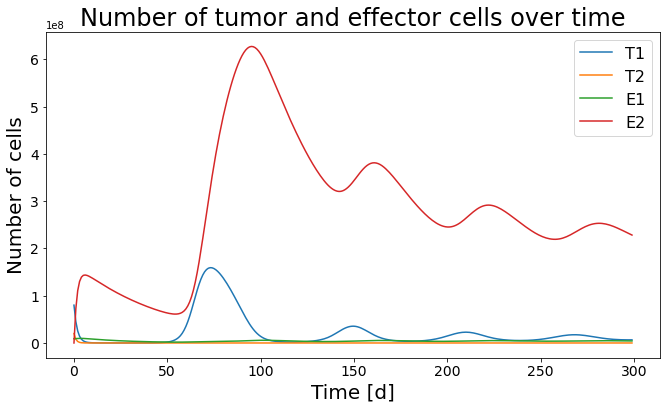

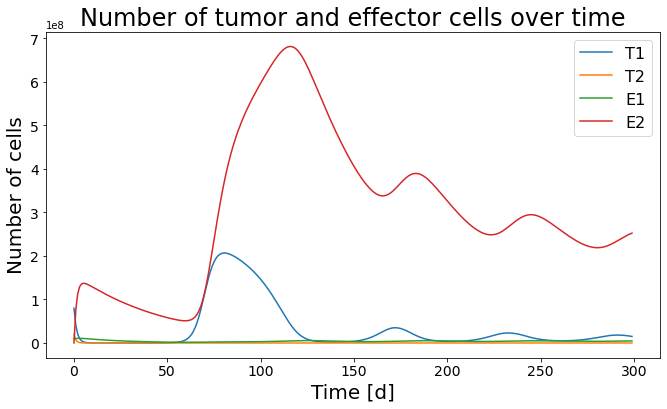

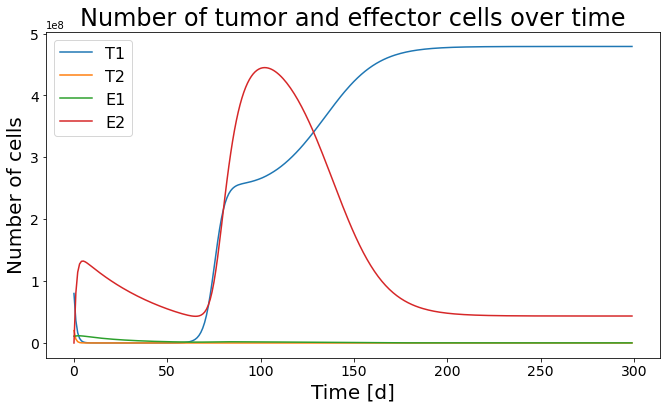

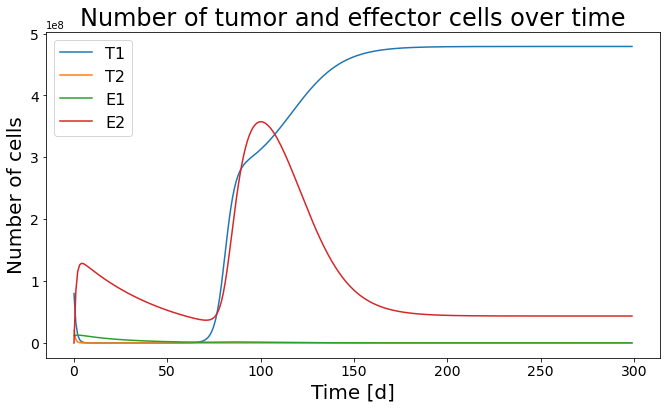

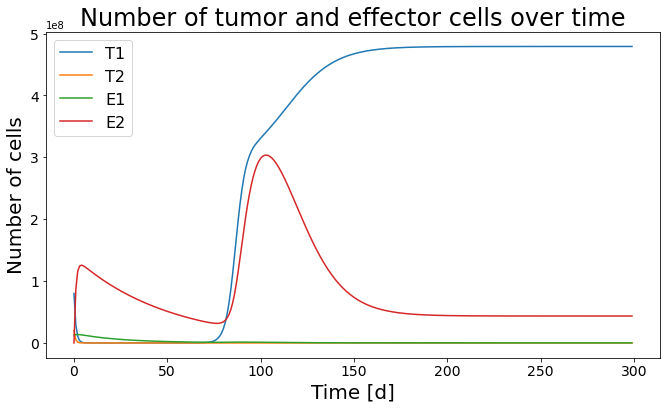

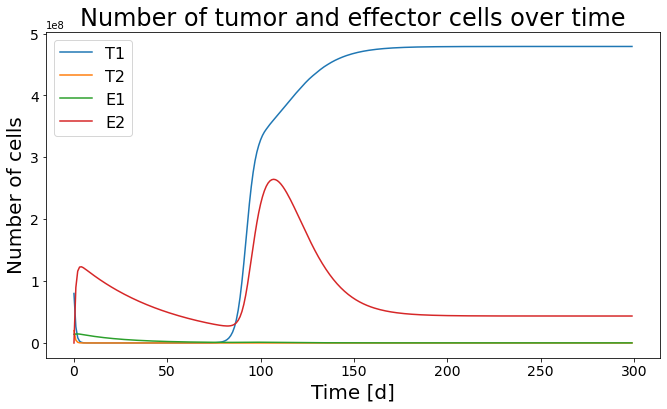

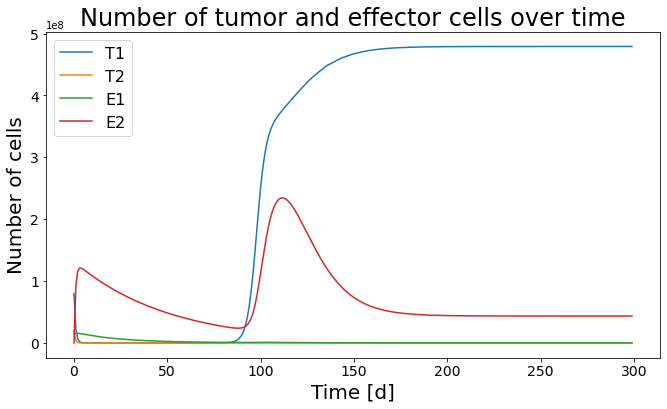

In [5]:
def ode_system(t, state, g1,g2,a11,a12,a21,p1,d1,d2,e1,e2,r1,r2,r3,s1,s2,i12,i21,K1,K2):
    T1,T2,E1,E2 = state
    
    dT1dt = g1*T1*(1-T1/K1) - a11*E1*T1 - a12*E2*T1 - i12*T1*T2
    dT2dt = g2*T2*(1-T2/K2) - a21*E1*T2 - i21*T1*T2
    dE1dt = p1 - d1*E1 - e1*(T1+T2)*E1 + ((r1*(T1+T2))/(s1+T1+T2))*E1
    dE2dt = -d2*E2 - e2*T1*E2 + ((r2*T1)/(s2+T1))*E2 + r3*E1*(T1+T2)
    return [dT1dt, dT2dt, dE1dt, dE2dt]

g1 = 0.514
g2 = 0.35 * g1
a11 = 1.1e-7
a12 = 1.1e-10
a21 = a11
p1 = 1.3e4
d1 = 4.12e-2
d2 = 2.0e-2
e1 = 3.42e-10
e2 = e1
r1 = 1.24e-1
r2 = 1.24e-3
r3 = 1.1e-7
s1 = 2.02e7
s2 = s1
i12 = 1.1e-9
i21 = 1.5*i12
K1 = 5e8
K2 = K1

values_at_t250 = list()

p = (g1,g2,a11,a12,a21,p1,d1,d2,e1,e2,r1,r2,r3,s1,s2,i12,i21,K1,K2)
E1_list = [0.5e7, 0.6e7, 0.7e7, 0.8e7, 0.9e7, 1e7, 1.1e7, 1.2e7, 1.3e7, 1.4e7, 1.5e7]
for i in range(11):
    E1 = E1_list[i]
    initial = [8.0e7,2.0e7,E1,0]

    t_span = (0, 300.0)
    t = np.arange(0, 300.0, 1)

    result_solve_ivp = solve_ivp(ode_system, t_span, initial, args=p, t_eval=t)

    labels = ['T1', 'T2', 'E1', 'E2']
    fig = plt.figure(figsize=(11,6))
    for i in range(result_solve_ivp.y.shape[0]):
        plt.plot(result_solve_ivp.t, result_solve_ivp.y[i], label=labels[i])
        values_at_t250.append(result_solve_ivp.y[i][249])

    plt.xlabel('Time [d]', fontsize=20) # the horizontal axis represents the time 
    plt.ylabel('Number of cells', fontsize=20)
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.title('Number of tumor and effector cells over time', fontsize = 24)
    plt.legend(fontsize=16) # show how the colors correspond to the components of X
    fig.savefig('Output_ODE_test.jpg', dpi=300)
    plt.show()

In [6]:
values_at_t250 = [values_at_t250[i] for i in range(0,len(values_at_t250),4)]

# Plot the number of tumor cells against the number of initial $E_{1}$ cells. 

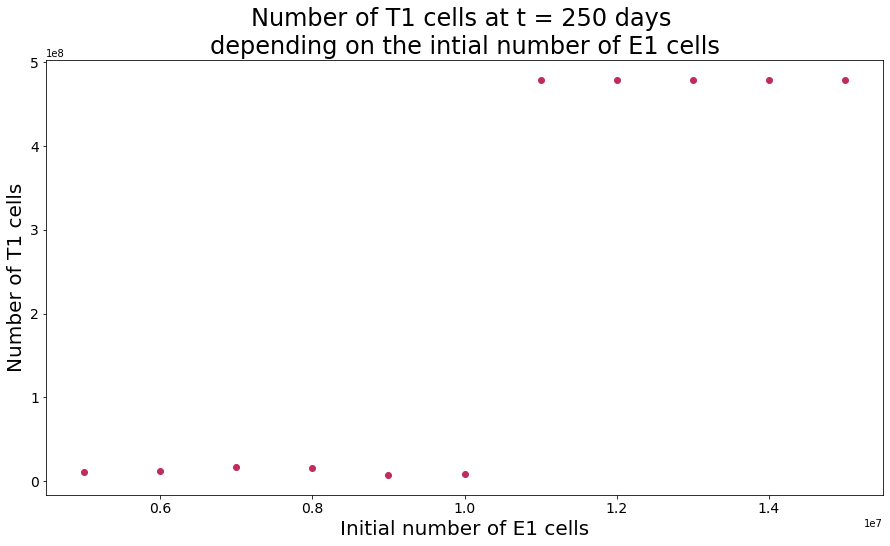

In [7]:
fig = plt.figure(figsize=(15,8))
plt.scatter(E1_list, values_at_t250, color='#c02d5c')

plt.xlabel('Initial number of E1 cells', fontsize=20) # the horizontal axis represents the time 
plt.ylabel('Number of T1 cells', fontsize=20)
plt.xticks(size=14)
plt.yticks(size=14)
plt.title('Number of T1 cells at t = 250 days \ndepending on the intial number of E1 cells', fontsize = 24)
# show how the colors correspond to the components of X
fig.savefig('Sensitivity_E1.jpg', dpi=300)
plt.show()

# Extract values for the number of tumor cells for two different initial $E_{1}$ values over time and plot phase diagram and number of tumor cells against time.

In [8]:
def ode_system(t, state, g1,g2,a11,a12,a21,p1,d1,d2,e1,e2,r1,r2,r3,s1,s2,i12,i21,K1,K2):
    T1,T2,E1,E2 = state
    
    dT1dt = g1*T1*(1-T1/K1) - a11*E1*T1 - a12*E2*T1 - i12*T1*T2
    dT2dt = g2*T2*(1-T2/K2) - a21*E1*T2 - i21*T1*T2
    dE1dt = p1 - d1*E1 - e1*(T1+T2)*E1 + ((r1*(T1+T2))/(s1+T1+T2))*E1
    dE2dt = -d2*E2 - e2*T1*E2 + ((r2*T1)/(s2+T1))*E2 + r3*E1*(T1+T2)
    return [dT1dt, dT2dt, dE1dt, dE2dt]

g1 = 0.514
g2 = 0.35 * g1
a11 = 1.1e-7
a12 = 1.1e-10
a21 = a11
p1 = 1.3e4
d1 = 4.12e-2
d2 = 2.0e-2
e1 = 3.42e-10
e2 = e1
r1 = 1.24e-1
r2 = 1.24e-3
r3 = 1.1e-7
s1 = 2.02e7
s2 = s1
i12 = 1.1e-9
i21 = 1.5*i12
K1 = 5e8
K2 = K1

values = dict()

p = (g1,g2,a11,a12,a21,p1,d1,d2,e1,e2,r1,r2,r3,s1,s2,i12,i21,K1,K2)
E1_list = [1e7,1.2e7]
for i in range(len(E1_list)):
    E1 = E1_list[i]
    initial = [8.0e7,2.0e7,E1,0]

    t_span = (0, 300.0)
    t = np.arange(0, 300.0, 1)

    result_solve_ivp = solve_ivp(ode_system, t_span, initial, args=p, t_eval=t)

    labels = ['T1', 'T2', 'E1', 'E2']
    results = list()
    for i in range(result_solve_ivp.y.shape[0]):
        results.append(result_solve_ivp.y[i])
    values[E1] = results

In [9]:
#print(values[10000000][0])
tumor_cells = list()
E1_cells = list()
for i in range(len(values[10000000][0])):
    val = values[10000000][0][i] + values[10000000][1][i]
    tumor_cells.append(val)
    E1_cells.append(values[10000000][2][i])
    
tumor_cells_2 = list()
E1_cells_2 = list()
for i in range(len(values[12000000][0])):
    val = values[12000000][0][i] + values[12000000][1][i]
    tumor_cells_2.append(val)
    E1_cells_2.append(values[12000000][2][i])

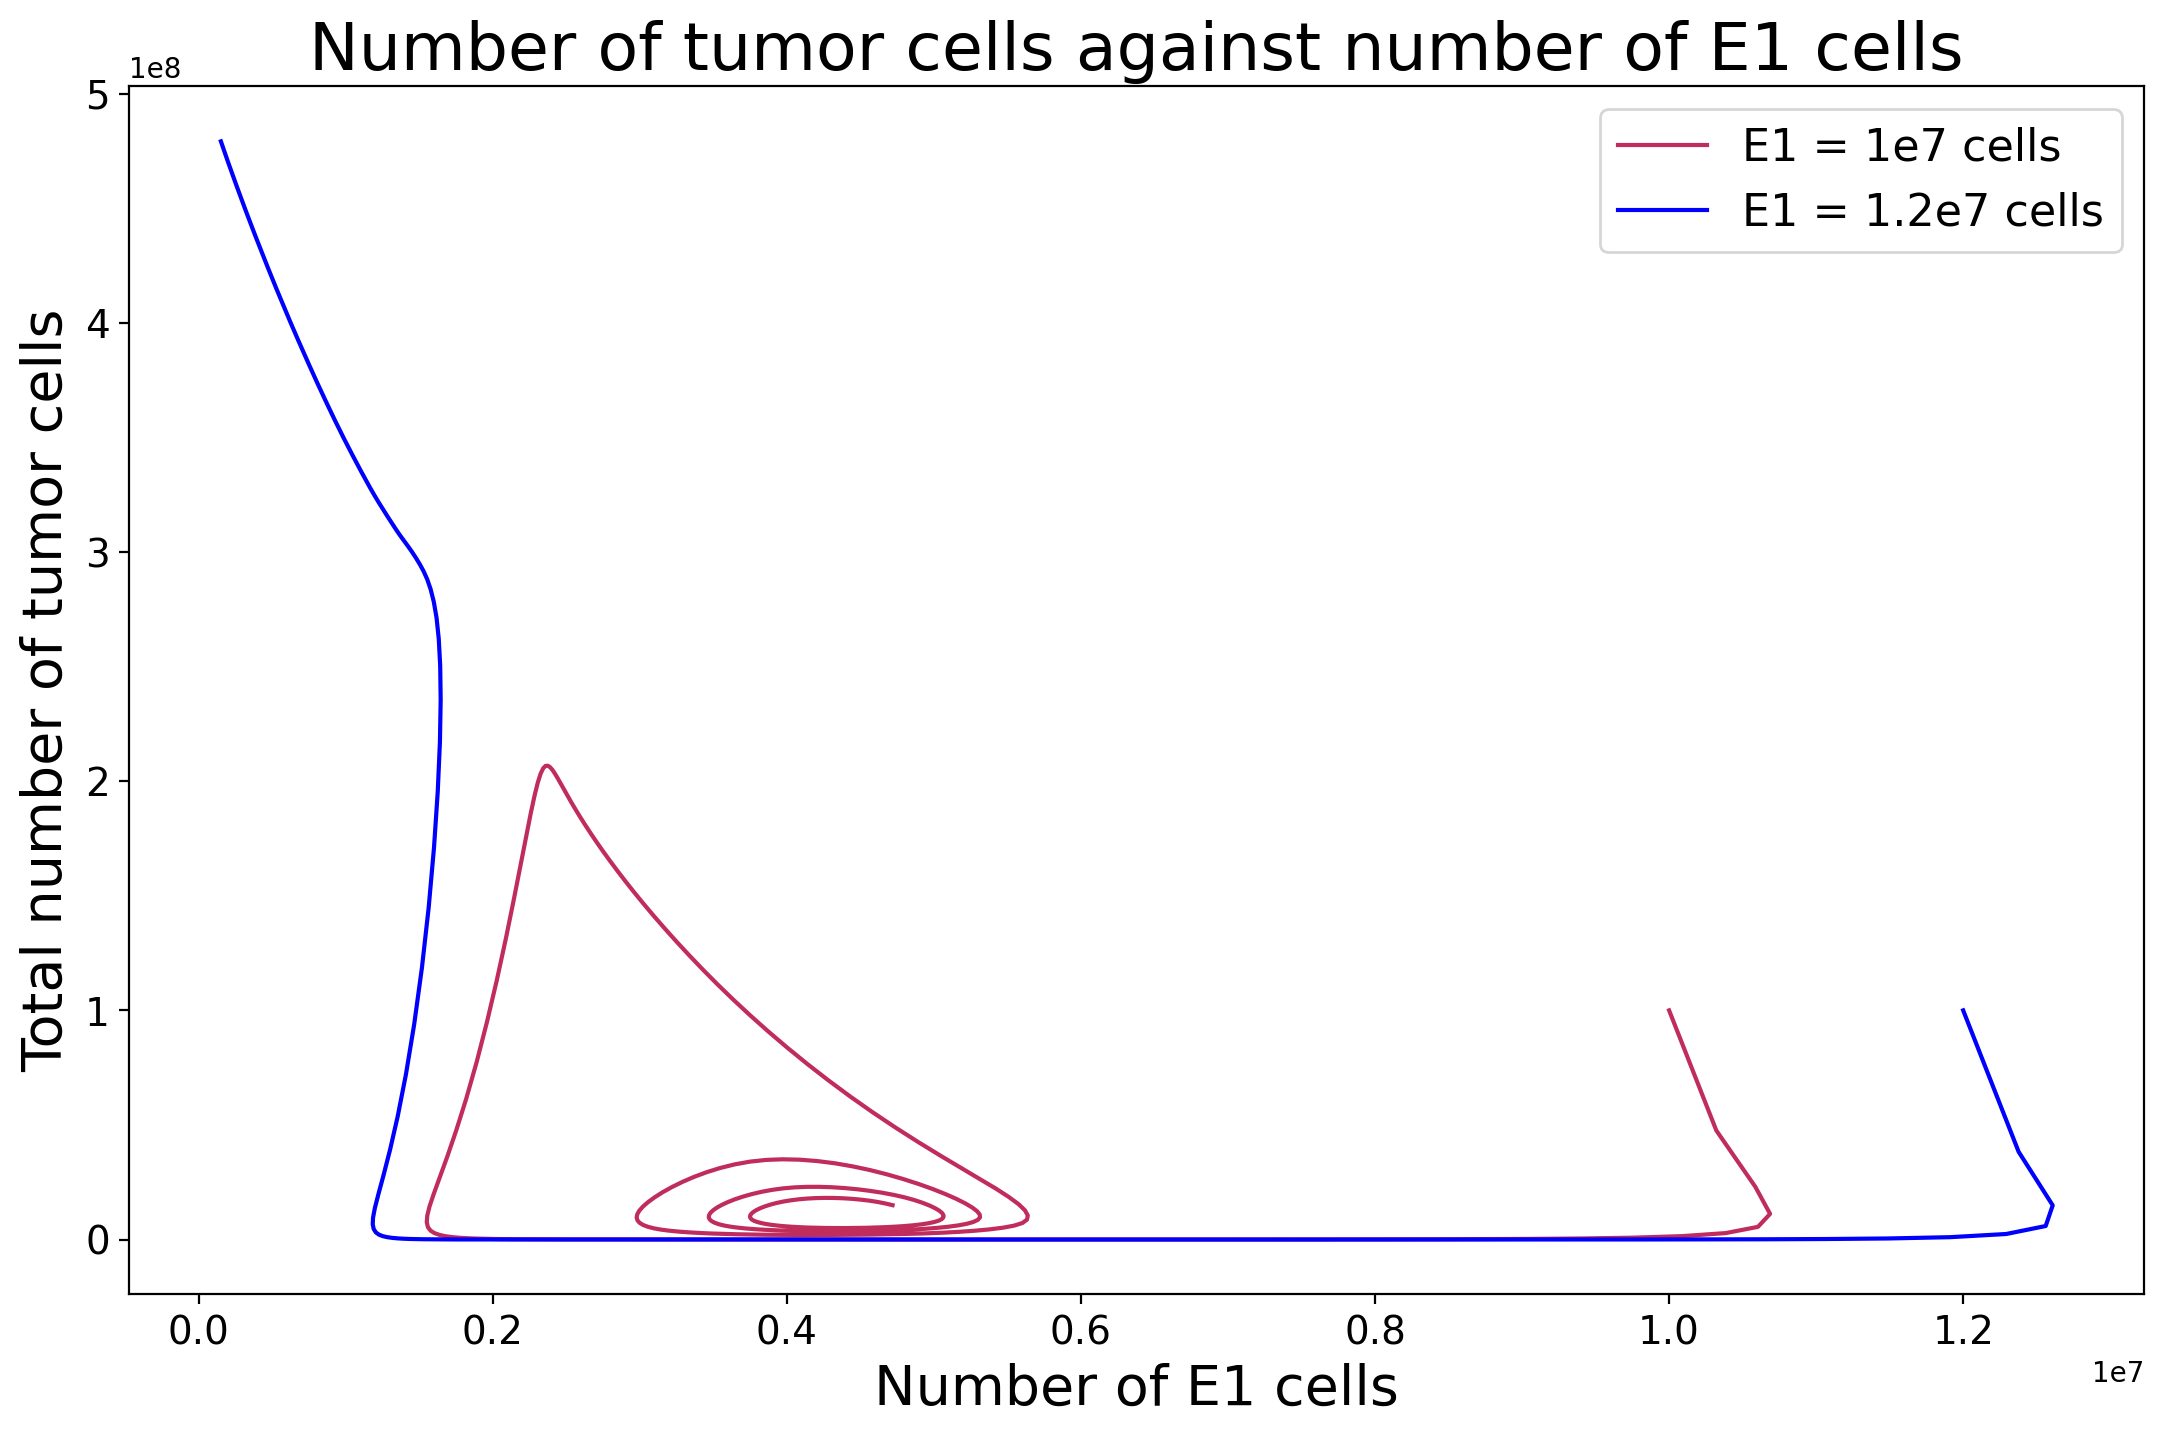

In [10]:
fig = plt.figure(figsize=(13,8), dpi=200)
plt.plot(E1_cells, tumor_cells, color='#c02d5c')
plt.plot(E1_cells_2, tumor_cells_2, color='blue')

labels=['E1 = 1e7 cells', 'E1 = 1.2e7 cells']
plt.xlabel('Number of E1 cells', fontsize=20) # the horizontal axis represents the time 
plt.ylabel('Total number of tumor cells', fontsize=20)
plt.xticks(size=14)
plt.yticks(size=14)
plt.title('Number of tumor cells against number of E1 cells', fontsize = 24)
# show how the colors correspond to the components of X
plt.legend(labels, fontsize = 16)
fig.savefig('Phase_diagram.jpg', dpi=300)
plt.show()

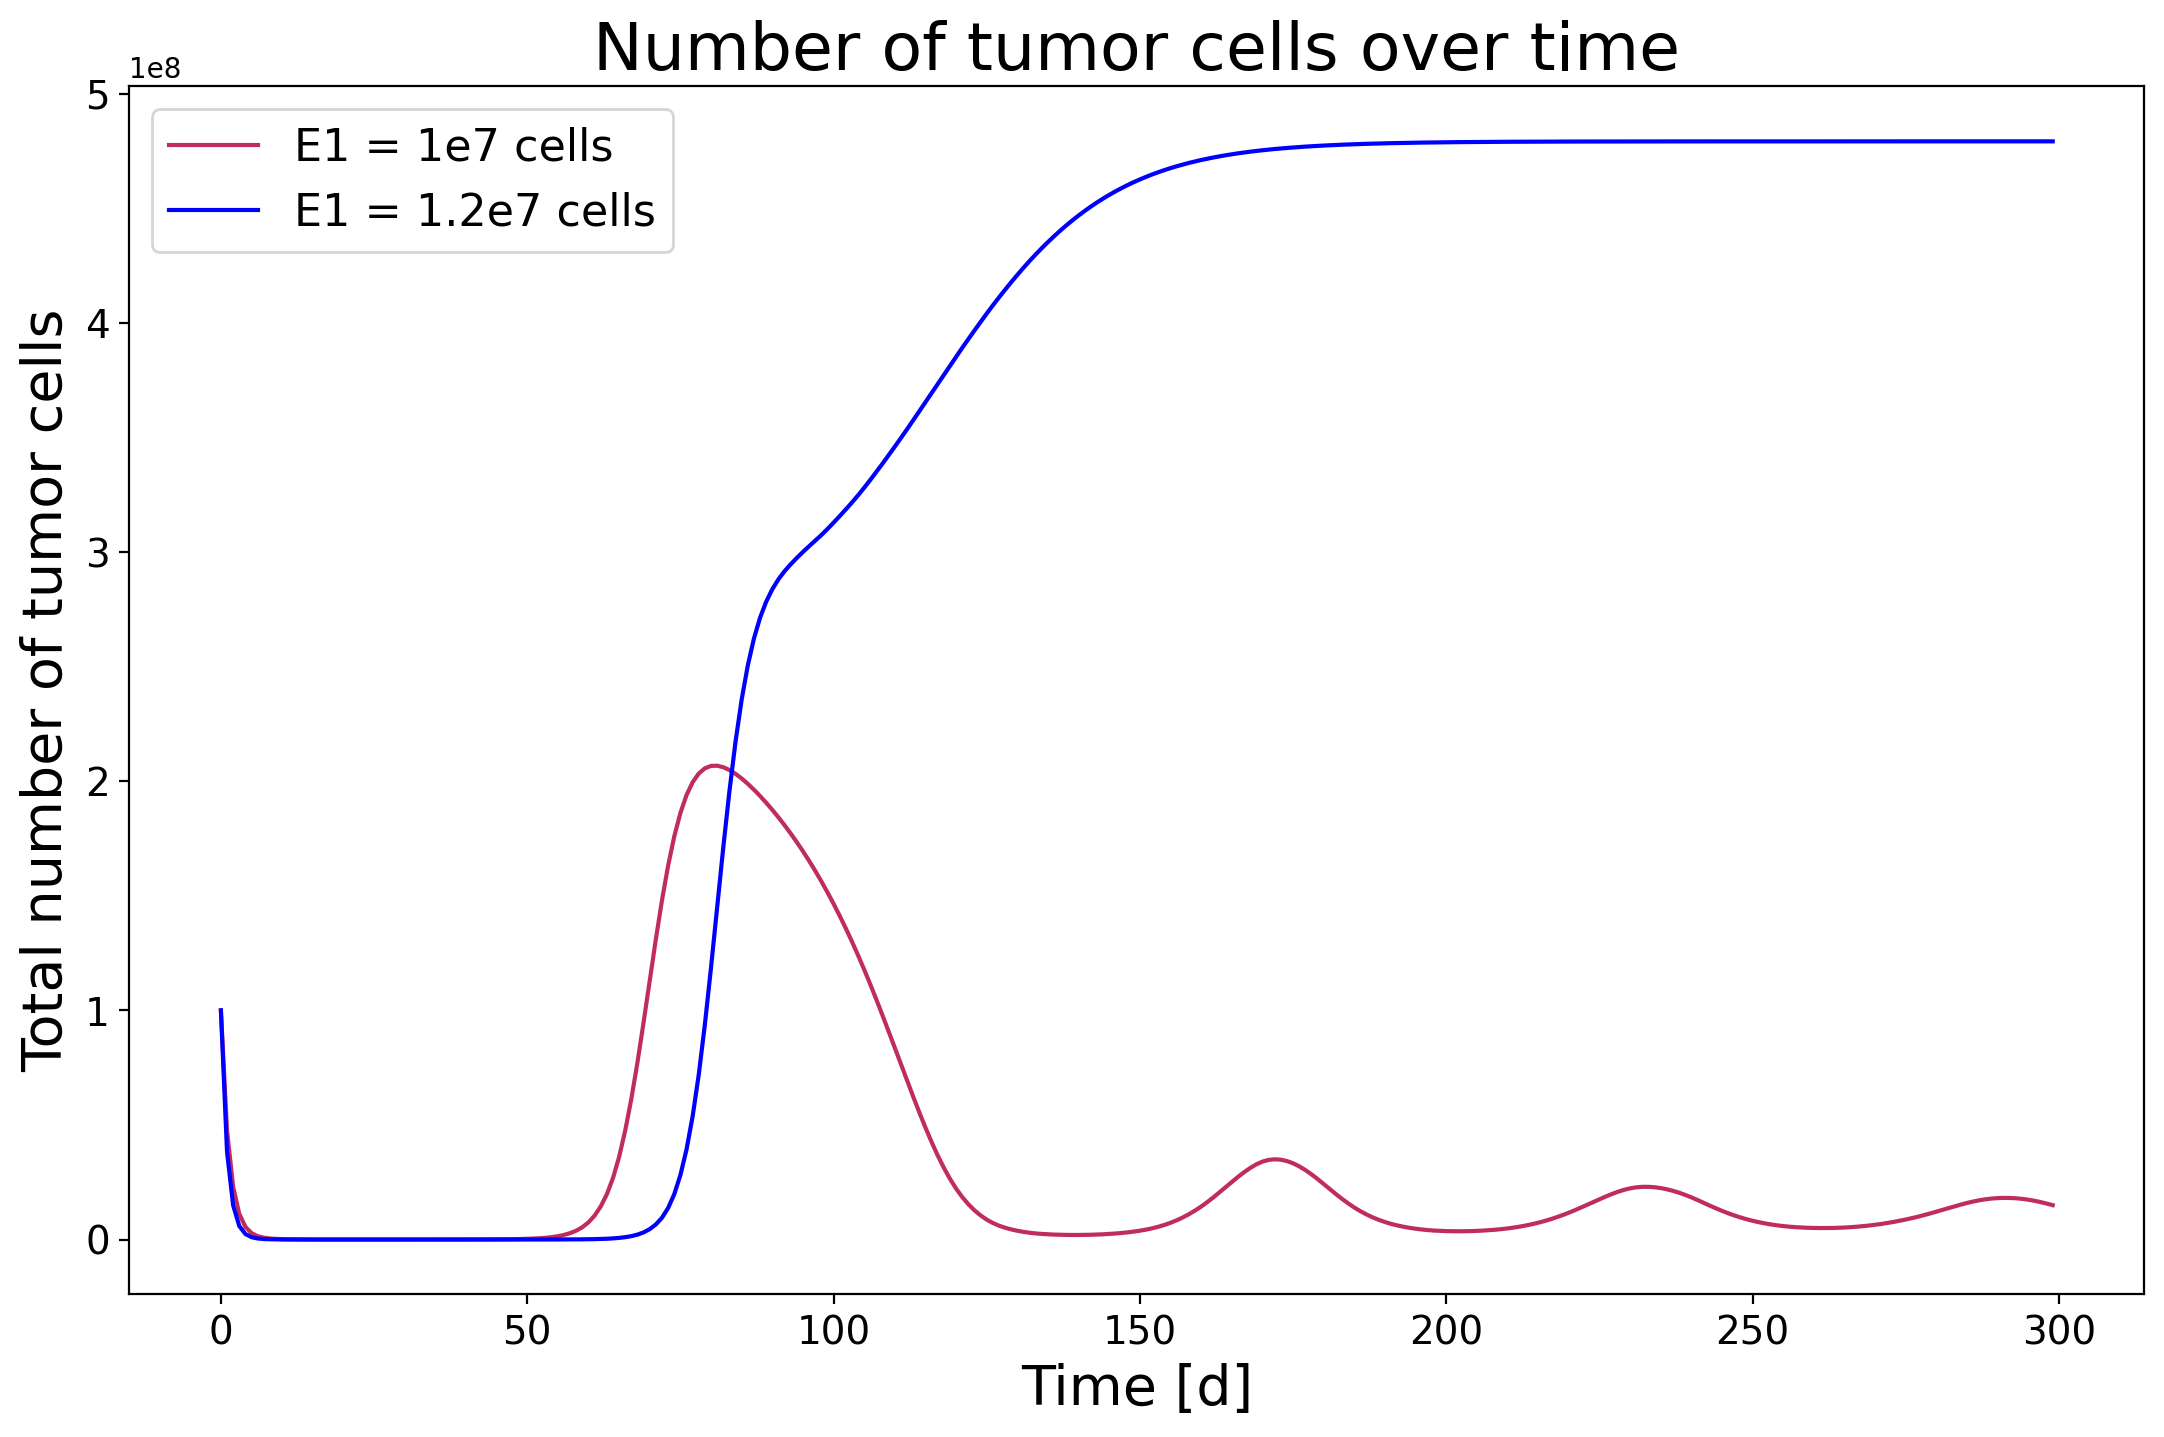

In [11]:
fig = plt.figure(figsize=(13,8), dpi=200)
plt.plot(t, tumor_cells, color='#c02d5c')
plt.plot(t, tumor_cells_2, color='blue')

plt.xlabel('Time [d]', fontsize=20) # the horizontal axis represents the time 
plt.ylabel('Total number of tumor cells', fontsize=20)
plt.xticks(size=14)
plt.yticks(size=14)
plt.title('Number of tumor cells over time', fontsize = 24)
labels=['E1 = 1e7 cells', 'E1 = 1.2e7 cells']
plt.legend(labels, fontsize = 16)
fig.savefig('Tumor_dynamics.jpg', dpi=300)
plt.show()

# Sensitivity analysis with Sobol's method using the SALib package

In [11]:
def ode_system(t, state,g1,g2,a11,a12,a21,p1,d1,d2,e1,e2,r1,r2,r3,s1,s2,i12,i21,K1,K2):
    T1,T2,E1,E2 = state
    
    dT1dt = g1*T1*(1-T1/K1) - a11*E1*T1 - a12*E2*T1 - i12*T1*T2
    dT2dt = g2*T2*(1-T2/K2) - a21*E1*T2 - i21*T1*T2
    dE1dt = p1 - d1*E1 - e1*(T1+T2)*E1 + ((r1*(T1+T2))/(s1+T1+T2))*E1
    dE2dt = -d2*E2 - e2*T1*E2 + ((r2*T1)/(s2+T1))*E2 + r3*E1*(T1+T2)
    return [dT1dt, dT2dt, dE1dt, dE2dt]

g10 = 0.514
g20 = 0.35 * g10
a110 = 1.1e-7
a120 = 1.1e-10
a210 = a110
p10 = 1.3e4
d10 = 4.12e-2
d20 = 2.0e-2
e10 = 3.42e-10
e20 = e10
r10 = 1.24e-1
r20 = 1.24e-3
r30 = 1.1e-7
s10 = 2.02e7
s20 = s1
i120 = 1.1e-9
i210 = 1.5*i12
K10 = 5e8
K20 = K10
T10 = 8.0e7
T20 = 2.0e7
E10 = 1.1e7
E20 = 0

t_span = (0.0, 300.0)
t = np.arange(0.0, 300.0, 1)

result_solve_ivp = solve_ivp(ode_system, t_span, initial, args=p)


#definition of the problem settings
#the parameters as and the initial parameters for T1, T2, E1, and E2 are varied
problem = {
    'num_vars': 23,
    'names': ['g1','g2','a11','a12','a21','p1','d1','d2','e1','e2','r1','r2','r3','s1','s2','i12','i21','K1','K2',\
             'T1','T2','E1','E2'],
    'bounds': [[0.8*g10,1.2*g10],[0.8*g20,1.2*g20],[0.8*a110,1.2*a110],[0.8*a120,1.2*a120],[0.8*a210,1.2*a210],\
               [0.8*p10,1.2*p10],[0.8*d10,1.2*d10],[0.8*d20,1.2*d20],[0.8*e10,1.2*e10],[0.8*e20,1.2*e20],\
               [0.8*r10,1.2*r10],[0.8*r20,1.2*r20],[0.8*r30,1.2*r30],[0.8*s10,1.2*s10],[0.8*s20,1.2*s20],\
               [0.8*i120,1.2*i120],[0.8*i210,1.2*i210],[0.8*K10,1.2*K10],[0.8*K20,1.2*K20],[0.8*T10,1.2*T10],\
               [0.8*T20,1.2*T20],[0.8*E10,1.2*E10],[0,E10]]
}

#sampling with n = 10, leading to 480 samples
param_values = saltelli.sample(problem, 10)

#evaluation of the model
for i in range(len(param_values)):
    vals = param_values[i][:19]
    initial = param_values[i][19:]
    sol = solve_ivp(ode_system, t_span, initial, args=vals,t_eval=t)
    if i == 0:
        Y = sol.y
        #Y = sol.y.reshape((sol.y.shape[0]*sol.y.shape[1],1))
    else:
        #Y = np.append(Y, sol.y.reshape((sol.y.shape[0]*sol.y.shape[1],1)), axis=1)
        Y = np.append(Y, sol.y, axis=0)
print(Y.shape)
np.savetxt('test.out',Y, delimiter=',', fmt='%.18f')

C:\Users\laras\anaconda3\lib\site-packages\SALib\sample\saltelli.py:94: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (10) is equal to `2^n`.
        
  warnings.warn(msg)


(1920, 300)


In [12]:
#reading of the output file
values = np.loadtxt("test.out",delimiter=',', dtype=float)

In [13]:
#sobol analysis for the problem 
S_indices = [sobol.analyze(problem, Y) for Y in values.T]

In [15]:
values_s1 = S_indices[250]['S1']

In [16]:
print(values_s1)

[ 0.02716781  0.03724329  0.68603832 -0.0108566   0.02716781  0.03735469
  0.66113939  0.14234826  0.02716781  0.0356917   0.53884975 -0.02050896
  0.02716781  0.03738773  0.69411509  0.01289318  0.02716781  0.03705073
  0.66797168  0.15937505  0.02716781  0.03574569  0.56959616]


In [106]:
names2 = [r'$g_{1}$',r'$g_{2}$',r'$a_{11}$',r'$a_{12}$',r'$a_{21}$',r'$p_{1}$',r'$d_{1}$',r'$d_{2}$',r'$e_{1}$',\
          r'$e_{2}$',r'$r_{1}$',r'$r_{2}$',r'$r_{3}$',r'$s_{1}$',r'$s_{2}$',r'$i_{12}$',r'$i_{21}$',r'$K_{1}$',\
          r'$K_{2}$',r'$T_{1}$',r'$T_{2}$',r'$E_{1}$',r'$E_{2}$']

names = [r'birth rate of $T_{1}$ cells',r'birth rate of $T_{2}$ cells',\
         r'elimination of $T_{1}$'+'\n'+r'cells by $E_{1}$ cells',r'elimination of $T_{1}$'+'\n'+r'cells by $E_{2}$ cells',\
         r'elimination of $T_{2}$ cells by $E_{1}$ cells',r'natural presence of $E_{1}$ cells',\
         r'natural death rate of $E_{1}$ cells',r'natural death rate of $E_{2}$ cells',\
         r'death rate of $E_{1}$ cells',\
         r'death rate of $E_{2}$ cells',\
         r'rectruitment of $E_{1}$ cells (cytocidal activities)',\
         r'rectruitment of $E_{2}$ cells'+'\n'+r'through encounters with'+'\n'+r'$E_{1}$ cell-processed $T_{1}$ cells)',\
         r'rectruitment of $E_{2}$ cells (encounters of $E_{1}$ cells with tumor cells)',\
         'heterogeneity factor 1','heterogeneity\nfactor 2',\
         r'interaction of'+'\n'+r'$T_{1}$ and $T_{2}$ cells',r'interaction of $T_{2}$ and $T_{2}$ cells',\
         r'carrying capacity of $E_{1}$ cells',r'carrying capacity'+'\n'+r'of $E_{2}$ cells',\
         r'initial number of $T_{1}$ cells',r'initial number of $T_{2}$ cells',\
         r'initial number of $E_{1}$ cells',r'initial number of $E_{2}$ cells']
dict_values = dict()
for i in range(len(values_s1)):
    dict_values[names[i]] = values_s1[i]
print(dict_values)

new_dict = dict(sorted(dict_values.items(), key = lambda x: x[1], reverse = True))

{'birth rate of $T_{1}$ cells': 0.02716781230778399, 'birth rate of $T_{2}$ cells': 0.03724329377453922, 'elimination of $T_{1}$\ncells by $E_{1}$ cells': 0.6860383247260404, 'elimination of $T_{1}$\ncells by $E_{2}$ cells': -0.010856597212621558, 'elimination of $T_{2}$ cells by $E_{1}$ cells': 0.027167812307783697, 'natural presence of $E_{1}$ cells': 0.037354687640756286, 'natural death rate of $E_{1}$ cells': 0.6611393936470809, 'natural death rate of $E_{2}$ cells': 0.14234825830098272, 'death rate of $E_{1}$ cells': 0.027167812307784363, 'death rate of $E_{2}$ cells': 0.03569170247273089, 'rectruitment of $E_{1}$ cells (cytocidal activities)': 0.5388497525407316, 'rectruitment of $E_{2}$ cells\nthrough encounters with\n$E_{1}$ cell-processed $T_{1}$ cells)': -0.020508963209594357, 'rectruitment of $E_{2}$ cells (encounters of $E_{1}$ cells with tumor cells)': 0.027167812307783746, 'heterogeneity factor 1': 0.037387731633086584, 'heterogeneity\nfactor 2': 0.6941150926995411, 'inte

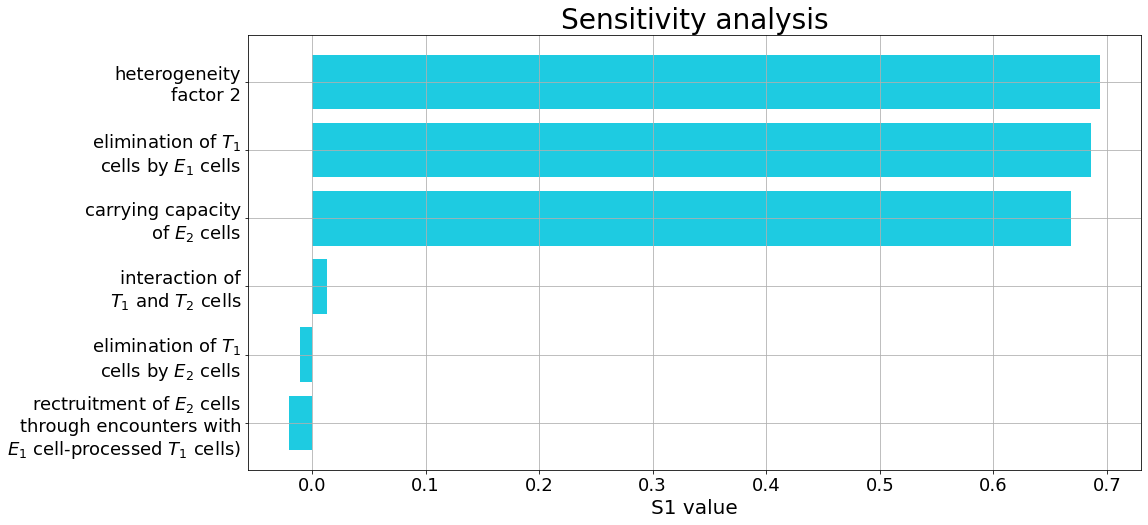

In [110]:
labels = list(new_dict.keys())
values = list(new_dict.values())

r = [0,1,2,20,21,22]

labels_2 = [labels[elem] for elem in r]
values_2 = [values[elem] for elem in r]

# the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(16,8))
y_pos = np.arange(len(labels))
y_pos_2 = np.arange(len(labels_2))


c = ['#1ecbe1','#f7b511','#c02d5c','#941ee1']
plot = ax.barh(y_pos_2, values_2, align='center', color='#1ecbe1')

# for bar, name in zip(ax.patches, labels[::-1]):
#     ax.text(0.1, bar.get_y()+bar.get_height()/2, name, color = 'black', ha = 'left', va = 'center') 


# for idx,rect in enumerate(plot):
#     ax.text(0, idx+.25, labels[idx], color = 'black',fontsize=16)
        
        
ax.set_yticks(y_pos_2) 
ax.set_yticklabels(labels_2)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('S1 value', fontsize=20)
ax.set_title('Sensitivity analysis', fontsize=28)
ax.tick_params(axis='both', which='major', labelsize=18)

ax.grid()

fig = ax.get_figure()
plt.show()
#plt.tight_layout()
fig.savefig('Test3.jpg', dpi = 400, bbox_inches='tight')

The Sobol indices at the time t = 250 show the influences of the input variables and the initial values for $T_{1}$, $T_{2}$, $E_{1}$, and $E_{2}$ on the values of the ODEs at that time. The 'ST' indices show the total influence of each input variable, taking first-order and higher-order interactions into account. 
The highest influence on the output values seem to have the third variable $a_{11}$, which stands for the elimination of tumor cells of type 1 by effector cells type 1, the 15th variable $s_{2}$, the carrying capacity of tumor cell type 2, and the initial number of $E_{2}$ cells which all have values above 1.6. 
The smallest influences have the elimination rate of $T_{1}$ cells by $E_{2}$ cells and the influence that $T_{2}$ cells have on $T_{1}$ cells ($i_{12}$).


In [29]:
print(labels)

['g1', 'g2', 'a11', 'a12', 'a21', 'p1', 'd1', 'd2', 'e1', 'e2', 'r1', 'r2', 'r3', 's1', 's2', 'i12', 'i21', 'K1', 'K2', 'T1', 'T2', 'E1', 'E2']
